# Operation of a cooled exothermic CSTR

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy.optimize import fsolve

In [2]:
params = {
    'axes.labelsize' : 'x-large',
    'ytick.labelsize' : 'large',
    'xtick.labelsize' : 'large'
}

rcParams.update(params)
plt.style.use('fivethirtyeight')

In [3]:
# Data
Fo = 40       # Feed flow rate, ft^3/h
F = 40        # Output flow rate, ft^/h
Vr = 48       # Reactor volume, ft^3
Cao = 0.55    # Initial concentration of A, lbmol/ft^3
Cp = 0.75     # Heat capacity, btu/lb/R
rho = 50      # Fluid density, lb/ft^3
R = 1.9872    # Universal gas constant, bu/lbmol/R
To = 530      # Initial temperature, R

# Kinetic data
E = 30000     # Activation energy, btu/lbmol
ko = 7.08e10  # Preexponential factor, 1/h
DHr = -30000  # Reaction heat, btu/lbmol

# cooling jacket
Fj = 49.9      # Cooling water flow rate, ft^/h
Tjo = 525      # Inlet temperature, R
Cpj = 1        # Heat capacity, btu/lb/R
rhoj = 62.3    # Water density, lb/ft^3
U = 150        # overall heat transfer coefficient, btu/h/ft^2/R
A = 250        # heat transfer area, ft^2

In [4]:
 def systemCST(x, p, full_return=False):

    (U, A, E, ko, Fo, F, R, Cao, Vr, rho, Cp, To, 
     DHr, rhoj, Cpj, Fj, Tjo) = p

    k = ko * np.exp(-E/R/x);
    Tj = (rhoj * Cpj * Fj * Tjo + U*A*x)/(rhoj*Cpj*Fj+U*A);
    q = U*A*(x-Tj);

    cA = Fo*Cao/(F+Vr*k);
    HX = - DHr*Vr*k*cA;
    g = rho*Cp*(Fo*To-F*x) + HX - q;
    
    if full_return:
        return [cA, x, Tj, HX]
    else:
        return g

In [5]:
param = np.array([U, A, E, ko, Fo, F, R, Cao, Vr, rho, Cp, To,
                  DHr, rhoj, Cpj, Fj, Tjo]).flatten()

In [6]:
T = fsolve(lambda x: systemCST(x, param), To)

In [7]:
solution = systemCST(T[0], param, full_return=True)

print('La concentracion final de A es {:1.3f} lbmol/ft^3'.format(solution[0]))
print('La temperatura de reaccion {:1.2f} R'.format(solution[1]))
print('La temperatura final del refrigerante {:1.2f} R'.format(solution[2]))

La concentracion final de A es 0.528 lbmol/ft^3
La temperatura de reaccion 532.81 R
La temperatura final del refrigerante 532.21 R


## Plots

In [8]:
T_start = 500
T_end = 700

Temps = np.linspace(T_start, T_end, 100)

ks = ko * np.exp(-E/R/Temps)

Tjs = (rhoj * Cpj * Fj * Tjo + U * A * Temps)/(rhoj * Cpj * Fj + U * A)

qs = U * A * (Tjs - Temps)
cAs = Fo * Cao / ( F + Vr * ks)

HPR = - DHr * Vr * ks * cAs
HWR = rho * Cp * (F * Temps - Fo * To) - qs

Balance_Energy = HPR - HWR

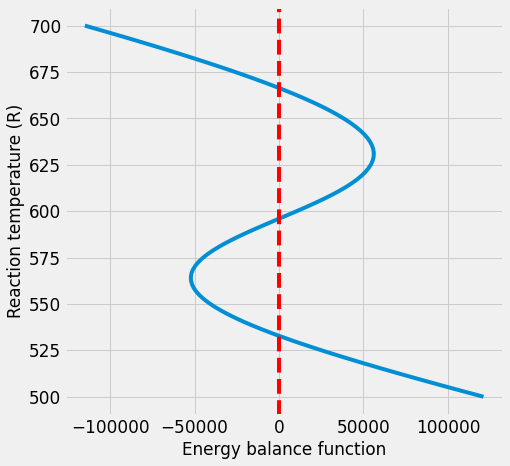

In [9]:
plt.figure(figsize=(7, 7))

plt.plot(Balance_Energy, Temps)
plt.axvline(x=0, color='r', ls='--')
plt.xlabel('Energy balance function')
plt.ylabel('Reaction temperature (R)')
plt.show()



In [10]:
Ts = fsolve(lambda x: systemCST(x, param), [540, 590, 670])

In [11]:
solution2 = systemCST(Ts, param, full_return=True)

In [12]:
HXs = solution2[3]

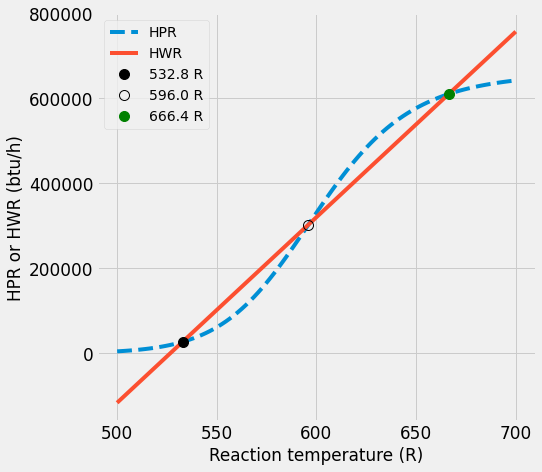

In [13]:
plt.figure(figsize=(7, 7))

plt.plot(Temps, HPR, ls='--',label='HPR')
plt.plot(Temps, HWR, label='HWR')
plt.plot(Ts[0], HXs[0], markersize=10, marker='o', lw=0, 
         markerfacecolor='black', markeredgecolor='black',
        label='%.1f R' % Ts[0])
plt.plot(Ts[1], HXs[1], markersize=10, marker='o', lw=0, 
         markerfacecolor='None', markeredgecolor='black',
        label='%.1f R' % Ts[1])
plt.plot(Ts[2], HXs[2], markersize=10, marker='o', lw=0, 
         markerfacecolor='green', markeredgecolor='green',
        label='%.1f R' % Ts[2])
plt.ylabel('HPR or HWR (btu/h)')
plt.xlabel('Reaction temperature (R)')
plt.legend()
plt.show()

